In [1871]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1872]:
import reservoirpy as rpy
from reservoirpy.nodes import Reservoir, Ridge
rpy.set_seed(42) 

In [1873]:
from sklearn.metrics import r2_score 
from sklearn.model_selection import train_test_split   

# SINAL APRBS DO BCS

In [1874]:
# Parâmetros do sinal 
t_final, dt = 1000, 1             # final e passo
t = np.arange(0, t_final, dt)
min_step, max_step = 60/60, 600/60 # tempo entre trocas 


FRENQUÊNCIA:

In [1875]:
# Sinal de Frequência APRBS
min_value_f, max_value_f = 35, 60   # limites
f = np.zeros_like(t)

current_value = np.random.uniform(min_value_f, max_value_f)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_f, max_value_f)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    f[i] = current_value

ABERTURA DE VÁLVULA:

In [1876]:
# Sinal de Abertura APRBS
min_value_zc, max_value_zc = 0, 100   # limites
Zc = np.zeros_like(t)

current_value = np.random.uniform(min_value_zc, max_value_zc)
time_next_change = 0

for i in range(len(t)):
    if t[i] >= time_next_change:
        current_value = np.random.uniform(min_value_zc, max_value_zc)
        time_next_change = t[i] + np.random.uniform(min_step, max_step)
        #print(time_next_change-t[i])
    Zc[i] = current_value

PLOT GRÁFICO:

In [1877]:
'''plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t, f, label="Freq APRBS", color='b')
plt.xlabel("Tempo")
plt.ylabel("FREQUÊNCIA")
plt.title("Sinal de frequência APRBS (35 a 60 Hz)")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t, Zc, label="Zc APRBS", color='r')
plt.xlabel("Tempo")
plt.ylabel("Abertura da válvula [%]")
plt.title("Sinal de Zc APRBS (0 a 100 %)")
plt.grid(True)
plt.legend()
plt.show()'''

'plt.figure(figsize=(12,6))\nplt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)\nplt.plot(t, f, label="Freq APRBS", color=\'b\')\nplt.xlabel("Tempo")\nplt.ylabel("FREQUÊNCIA")\nplt.title("Sinal de frequência APRBS (35 a 60 Hz)")\nplt.grid(True)\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(12, 6))\nplt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)\nplt.plot(t, Zc, label="Zc APRBS", color=\'r\')\nplt.xlabel("Tempo")\nplt.ylabel("Abertura da válvula [%]")\nplt.title("Sinal de Zc APRBS (0 a 100 %)")\nplt.grid(True)\nplt.legend()\nplt.show()'

ARQUIVO CSV:

In [1878]:
Entradas = pd.DataFrame({
    "f(Hz)": f,
    "Zc(%)": Zc
})
#print(Entradas)
 
Entradas.to_csv("Entradas_BCS.csv", index=False)
Entradas.to_excel("Entradas_BCS.xlsx", index=False)

# IMPORTE RESPOSTAS

In [1879]:
Saidas = pd.read_excel("Saidas_xlsx.xlsx")
Saidas = Saidas.to_numpy()
Entradas = Entradas.to_numpy()
P_in = Saidas[:,0].reshape(-1,1)
H = Saidas[:,1].reshape(-1,1)
print(P_in.shape)
print(H.shape)

(1000, 1)
(1000, 1)


In [1880]:
'''plt.figure(figsize=(12,5))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t, P_in, label="P_in", color='b')
plt.xlabel("Tempo")
plt.ylabel("Pressão [Pa]")
plt.title("Pressão de Admissão")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(12,5))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t, H, label="H", color='r')
plt.xlabel("Tempo")
plt.ylabel("Altura [m]")
plt.title("Altura Manométrica")
plt.grid(True)
plt.legend()
plt.show()'''

'plt.figure(figsize=(12,5))\nplt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)\nplt.plot(t, P_in, label="P_in", color=\'b\')\nplt.xlabel("Tempo")\nplt.ylabel("Pressão [Pa]")\nplt.title("Pressão de Admissão")\nplt.grid(True)\nplt.legend()\nplt.show()\n\nplt.figure(figsize=(12,5))\nplt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)\nplt.plot(t, H, label="H", color=\'r\')\nplt.xlabel("Tempo")\nplt.ylabel("Altura [m]")\nplt.title("Altura Manométrica")\nplt.grid(True)\nplt.legend()\nplt.show()'

# GERANDO MODELO

ESTRUTURA:

In [1881]:
reservoir = Reservoir(units=2000, lr=0.7, sr=0.95)
readout = Ridge(ridge=1e-6)

BCS_model = reservoir >> readout

DIVISÃO DE DADOS:

In [1882]:
x_aux, y_aux = Entradas[500:], Saidas[500:]

# Treino 
X_train, Y_train = Entradas[:500], Saidas[:500]
# Teste
X_test, Y_test = x_aux[:250], y_aux[:250]
# Validação
X_valid, Y_valid = x_aux[250:], y_aux[250:]

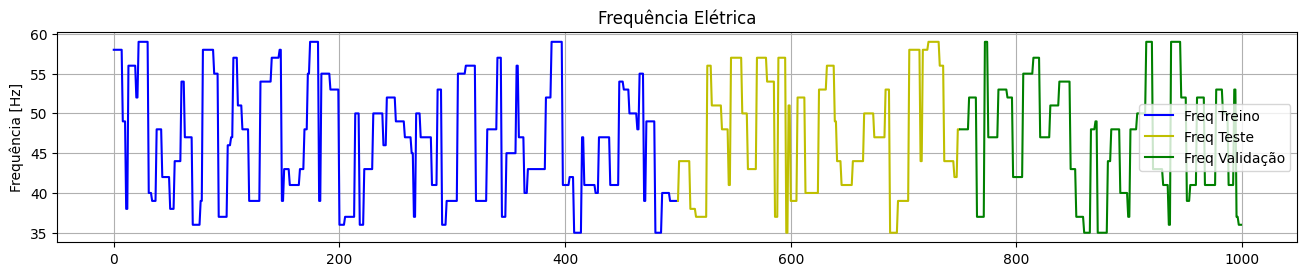

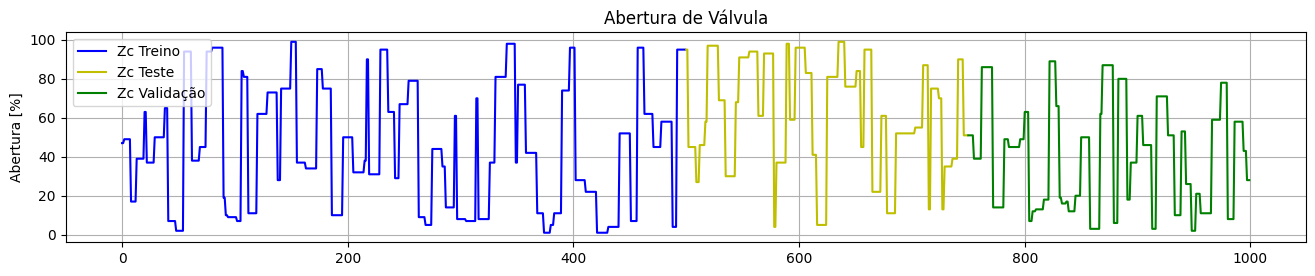

In [1883]:
t_a = np.arange(0, t_final/2, 1)
t_b = np.arange(t_final/2, 3*t_final/4, 1)
t_c = np.arange(3*t_final/4, t_final, 1)

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, X_train[:,0], label="Freq Treino", color='b')
plt.plot(t_b, X_test[:,0], label="Freq Teste", color='y')
plt.plot(t_c, X_valid[:,0], label="Freq Validação", color='g')
plt.ylabel("Frequência [Hz]")
plt.title("Frequência Elétrica")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, X_train[:,1], label="Zc Treino", color='b')
plt.plot(t_b, X_test[:,1], label="Zc Teste", color='y')
plt.plot(t_c, X_valid[:,1], label="Zc Validação", color='g')
plt.ylabel("Abertura [%]")
plt.title("Abertura de Válvula")
plt.grid(True)
plt.legend()
plt.show()

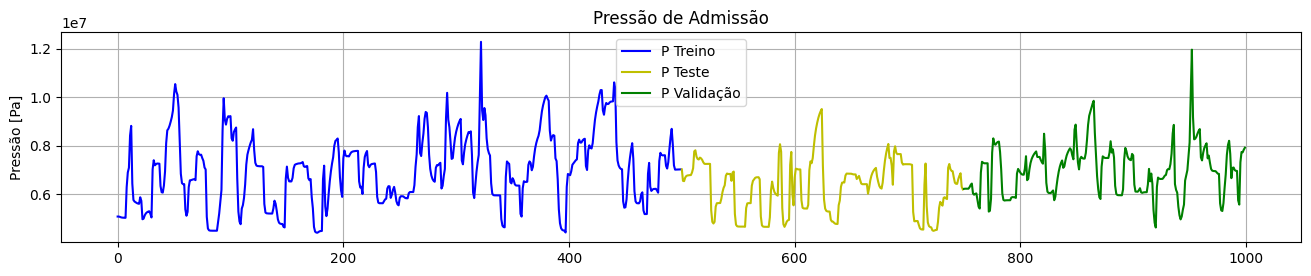

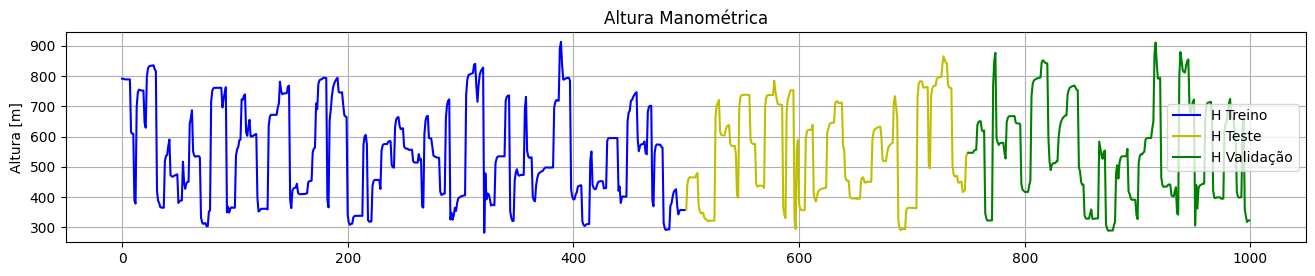

In [1884]:
plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, Y_train[:,0], label="P Treino", color='b')
plt.plot(t_b, Y_test[:,0], label="P Teste", color='y')
plt.plot(t_c, Y_valid[:,0], label="P Validação", color='g')
plt.ylabel("Pressão [Pa]")
plt.title("Pressão de Admissão")
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2)  # (n_linhas, n_colunas, índice)
plt.plot(t_a, Y_train[:,1], label="H Treino", color='b')
plt.plot(t_b, Y_test[:,1], label="H Teste", color='y')
plt.plot(t_c, Y_valid[:,1], label="H Validação", color='g')
plt.ylabel("Altura [m]")
plt.title("Altura Manométrica")
plt.grid(True)
plt.legend()
plt.show()


TREINAMENTO:

In [1885]:
BCS_model = BCS_model.fit(X_train, Y_train, warmup=10)

VERIFICANDO INICIALIZAÇÃO:

In [1886]:
print(reservoir.initialized, readout.initialized)

True True


RESULTADO:

(250, 2)


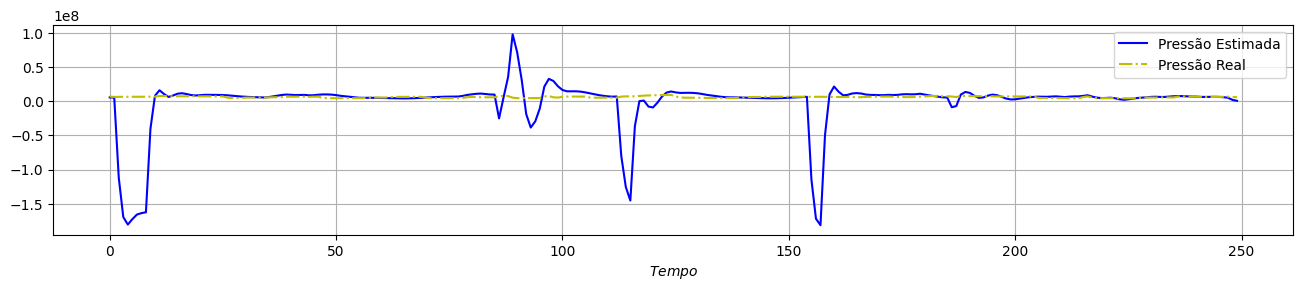

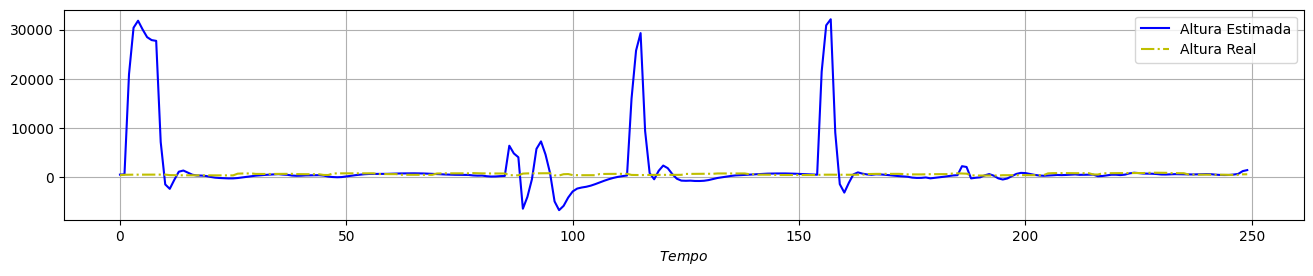

In [1887]:
Y_pred = BCS_model.run(X_test)
print(Y_pred.shape)

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 1) 
plt.title("")
plt.xlabel("$Tempo$")
plt.plot(Y_pred[:,0], label="Pressão Estimada", color="blue", linestyle="-")
plt.plot(Y_test[:,0], label="Pressão Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()

plt.figure(figsize=(16,6))
plt.subplot(2, 1, 2) 
plt.title("")
plt.xlabel("$Tempo$")
plt.plot(Y_pred[:,1], label="Altura Estimada", color="blue", linestyle="-")
plt.plot(Y_test[:,1], label="Altura Real", color="y", linestyle="-.")
plt.grid()
plt.legend()
plt.show()


MÉTRICA:

In [ ]:
R2_p = r2_score(Y_test[:,0], Y_pred[:,0])
R2_h = r2_score(Y_test[:,1], Y_pred[:,1])
print(f"R² (P): {R2_p}")
print(f"R² (H): {R2_h}")

R² (P): -1199.639899515267
R² (H): -1652.2810740773546
